<a href="https://colab.research.google.com/github/GDharan10/MachineLearningAlgorithmFromScratch/blob/main/Linear%20Algorithms%20/%20LogisticRegression_MulticlassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Overview**

**Used for multiclass classification.**

Logistic Regression model to handle multiclass classification. In multiclass classification, we can use a one-vs-rest (OvR) approach, where we train a separate binary classifier for each class. During prediction, the class with the highest probability will be chosen as the final prediction.

# **How It Works**

**Model Representation:**

Logistic Regression models the probability using the sigmoid function (logistic function):

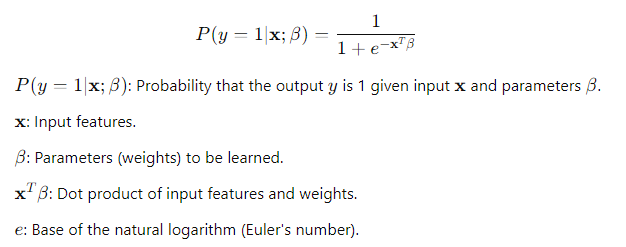

**Training:**

* Objective: Find the optimal parameters β that maximize the likelihood of the observed data. This is typically done by minimizing the negative log-likelihood (or cross-entropy loss) using optimization techniques like gradient descent.
* Loss Function: Negative Log-Likelihood (Cross-Entropy):
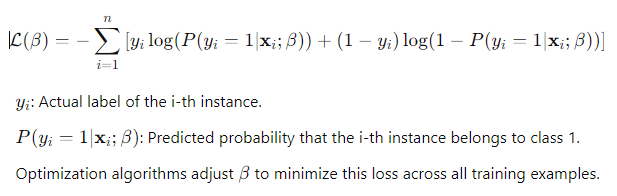

**Logistic Regression works by:**

1. Calculating a linear prediction using the dot product of feature values (X) and weights (self.weights), plus a bias (self.bias).
2. Applying the sigmoid function to the linear prediction to obtain probabilities.
3. Updating weights and bias iteratively using gradient descent to minimize the error between predicted probabilities and actual labels.

# **Background Python Code**
Below is the Python code for implementing linear regression from scratch.

In [61]:
import numpy as np

# Compute the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Multiclass Logistic Regression classifier using One-vs-Rest strategy
class MulticlassLogisticRegression():

    # Initialize the model
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr  # Learning rate
        self.n_iters = n_iters  # Number of iterations for gradient descent
        self.weights = None  # Initialize weights
        self.biases = None  # Initialize biases

    # Fit the model to the training data
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)  # Unique classes
        n_classes = len(self.classes)

        # Initialize weights and biases for each class
        self.weights = np.zeros((n_classes, n_features))
        self.biases = np.zeros(n_classes)

        # Train a logistic regression model for each class
        for idx, cls in enumerate(self.classes):
            y_binary = np.where(y == cls, 1, 0)  # Create binary labels for the current class
            self._train_one_vs_rest(X, y_binary, idx)

    # Train a binary logistic regression model for a specific class
    def _train_one_vs_rest(self, X, y, cls_idx):
        n_samples, n_features = X.shape
        weights = np.zeros(n_features)  # Initialize weights
        bias = 0  # Initialize bias

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, weights) + bias  # Compute linear predictions
            predictions = sigmoid(linear_pred)  # Apply sigmoid function to linear predictions

            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))  # Compute gradient for weights
            db = (1 / n_samples) * np.sum(predictions - y)  # Compute gradient for bias

            weights -= self.lr * dw  # Update weights
            bias -= self.lr * db  # Update bias

        self.weights[cls_idx] = weights
        self.biases[cls_idx] = bias

    # Predict class labels for samples in X
    def predict(self, X):
        linear_preds = np.dot(X, self.weights.T) + self.biases  # Compute linear predictions for all classes
        probabilities = sigmoid(linear_preds)  # Apply sigmoid function to linear predictions
        class_preds = np.argmax(probabilities, axis=1)  # Choose class with the highest probability
        return self.classes[class_preds]

    # Predict probabilities for samples in X
    def predict_proba(self, X):
        linear_preds = np.dot(X, self.weights.T) + self.biases  # Compute linear predictions for all classes
        probabilities = sigmoid(linear_preds)  # Apply sigmoid function to linear predictions
        return probabilities

# **Comparing the Algorithm with the Class**

**1. Initialization:**

* Algorithm: Initialize weights and bias to zero.
* Class (__init__ method):The class initializes the learning rate (lr), number of iterations (n_iters), and placeholders for weights and biases, which will be set during training.


**2. Training:**

* Algorithm:
 * For each class, create binary labels where the current class is 1 and all others are 0.
 * Train a binary logistic regression model for each class using gradient descent:
   * Compute linear predictions.
   * Apply the sigmoid function.
   * Compute gradients for weights and bias.
   * Update weights and bias.

* Class (fit method):
 * The fit method initializes weights and biases for each class and iterates through each class to train a binary logistic regression model using the _train_one_vs_rest method.
 * The _train_one_vs_rest method computes linear predictions, applies the sigmoid function, calculates gradients, and updates weights and bias for each class.

**3. Prediction:**

* Algorithm:
 * For each sample, compute linear predictions for all classes.
 * Apply the sigmoid function to get probabilities.
 * Select the class with the highest probability as the predicted class.

* Class (predict method):
 * The predict method computes linear predictions for all classes, applies the sigmoid function to get probabilities, and selects the class with the highest probability.
 * The predict_proba method returns the probabilities for each class.

**Summary**
* Initialization:
 * Both the algorithm and class initialize weights and biases for each class to zero.

* Training:
 * The algorithm creates binary labels for each class and trains a binary logistic regression model using gradient descent.
 * The class follows the same approach using the fit and _train_one_vs_rest methods.

* Prediction:
 * The algorithm computes linear predictions for all classes, applies the sigmoid function, and selects the class with the highest probability.
 * The class implements this using the predict and predict_proba methods.

The class implementation effectively mirrors the steps of the multiclass logistic regression algorithm using the One-vs-Rest strategy, ensuring that each class is trained independently and predictions are made by selecting the class with the highest probability.

# **Explanation of the fit method**
Let's perform a detailed explanation of the fit method for two iterations using an example.

## **Initial Setup**

Let's consider a simple example with 3 samples and 2 features:

In [62]:
import numpy as np

# Example dataset
X = np.array([[1, 2], [2, 3], [3, 4]])
y = np.array([0, 1, 2])

# Model parameters
lr = 0.01
n_iters = 2

n_samples, n_features = X.shape
classes = np.unique(y)
n_classes = len(classes)

# Initialize weights and biases for each class
weights = np.zeros((n_classes, n_features))
biases = np.zeros(n_classes)

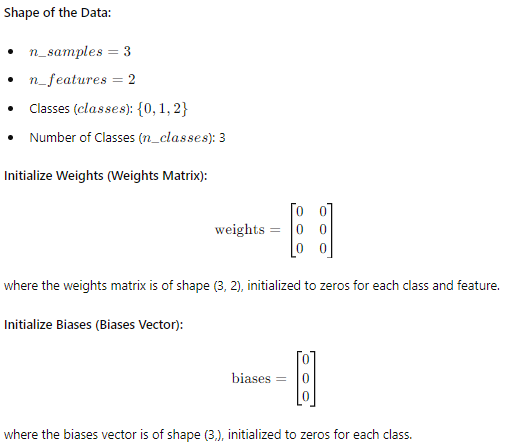

## **Class 0 Iteration 1**

In [ ]:
# Binary labels for class 0
y_binary = np.where(y == 0, 1, 0)  # [1, 0, 0]

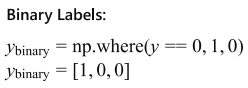

In [63]:
linear_pred = np.dot(X, weights[0]) + biases[0]  # [0, 0, 0]
predictions = sigmoid(linear_pred)  # [0.5, 0.5, 0.5]
dw = (1 / n_samples) * np.dot(X.T, (predictions - y_binary))  # [0.66666667, 0.83333333]
db = (1 / n_samples) * np.sum(predictions - y_binary)  # 0.16666666666666666
weights[0] -= lr * dw  # [-0.00666667, -0.00833333]
biases[0] -= lr * db  # -0.0016666666666666666

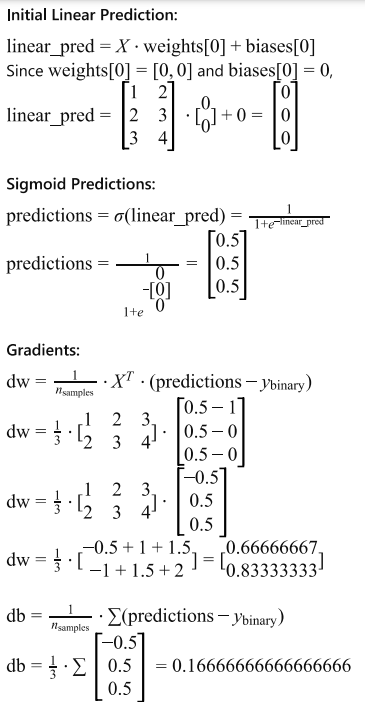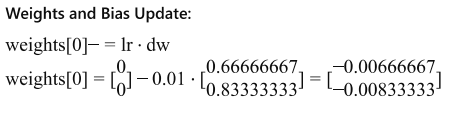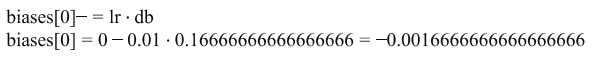

## **Class 0 Iteration 2**

In [64]:
linear_pred = np.dot(X, weights[0]) + biases[0]  # [-0.025, -0.04 , -0.055]
predictions = sigmoid(linear_pred)  # [0.49375033, 0.49000133, 0.48625347]
dw = (1 / n_samples) * np.dot(X.T, (predictions - y_binary))  # [0.64417113, 0.8008395]
db = (1 / n_samples) * np.sum(predictions - y_binary)  # 0.15666837457272303
weights[0] -= lr * dw  # [-0.01310838, -0.01634173]
biases[0] -= lr * db  # -0.003233350412393897

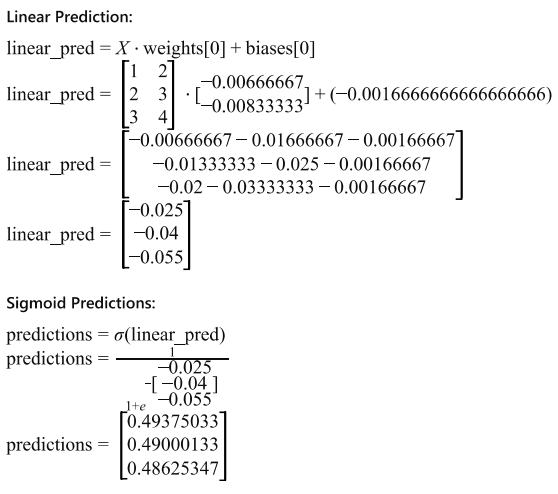

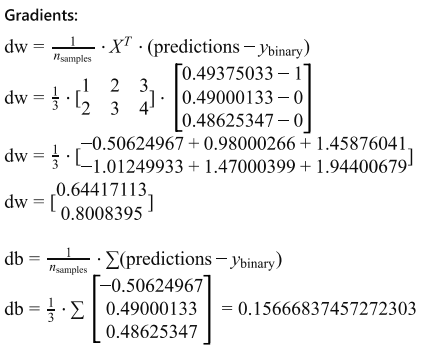

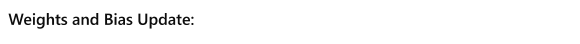

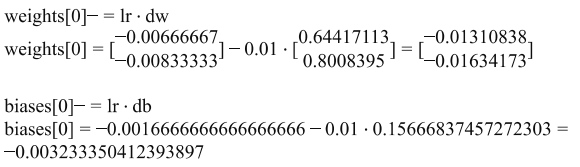

## **Class 1 Iteration 1**

In [ ]:
# Binary labels for class 1
y_binary = np.where(y == 1, 1, 0)  # [0, 1, 0]

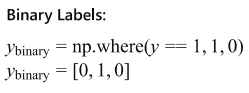

In [65]:
linear_pred = np.dot(X, weights[1]) + biases[1]  # [0, 0, 0]
predictions = sigmoid(linear_pred)  # [0.5, 0.5, 0.5]
dw = (1 / n_samples) * np.dot(X.T, (predictions - y_binary))  # [0.33333333, 0.5]
db = (1 / n_samples) * np.sum(predictions - y_binary)  # 0.16666666666666666
weights[1] -= lr * dw  # [-0.00333333, -0.005]
biases[1] -= lr * db  # -0.0016666666666666666

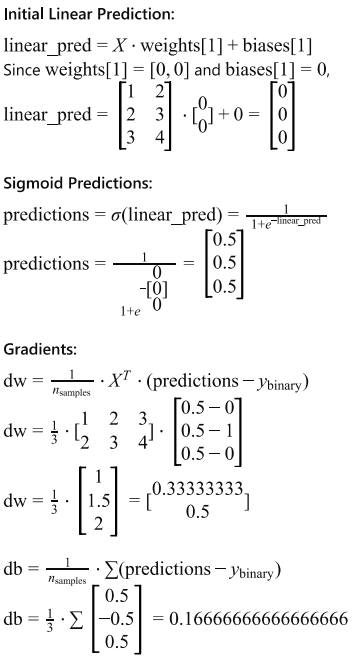

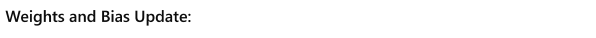

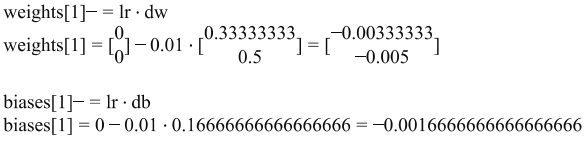

## **Class 1 Iteration 2**

In [66]:
linear_pred = np.dot(X, weights[1]) + biases[1]  # [-0.015, -0.02333333, -0.03166667]
predictions = sigmoid(linear_pred)  # [0.49625007, 0.49416693, 0.49208399]
dw = (1 / n_samples) * np.dot(X.T, (predictions - y_binary))  # [0.32027864, 0.4811123]
db = (1 / n_samples) * np.sum(predictions - y_binary)  # 0.16083366548181824
weights[1] -= lr * dw  # [-0.00653612, -0.00981112]
biases[1] -= lr * db  # -0.003275003321484849

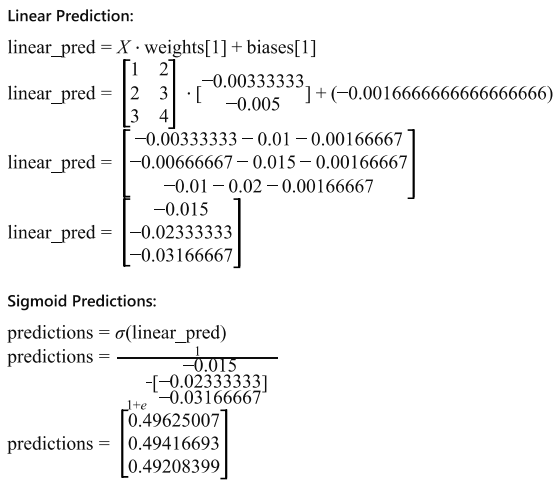

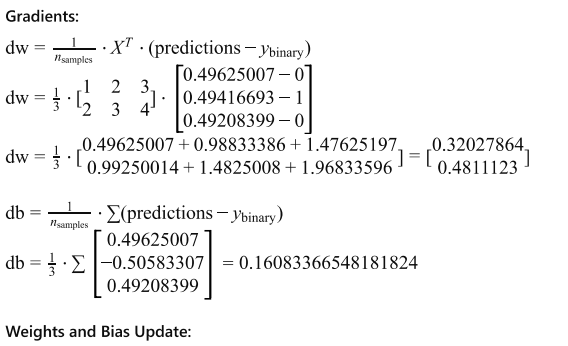

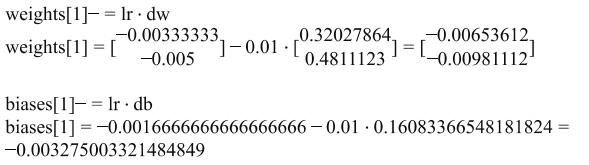

## **Class 2 Iteration 1**

In [ ]:
# Binary labels for class 2
y_binary = np.where(y == 2, 1, 0)  # [0, 0, 1]

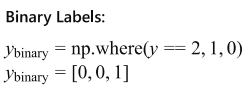

In [67]:
linear_pred = np.dot(X, weights[2]) + biases[2]  # [0, 0, 0]
predictions = sigmoid(linear_pred)  # [0.5, 0.5, 0.5]
dw = (1 / n_samples) * np.dot(X.T, (predictions - y_binary))  # [0., 0.16666667]
db = (1 / n_samples) * np.sum(predictions - y_binary)  # -0.16666666666666666
weights[2] -= lr * dw  # [0., -0.0016666667]
biases[2] -= lr * db  # 0.0016666666666666666

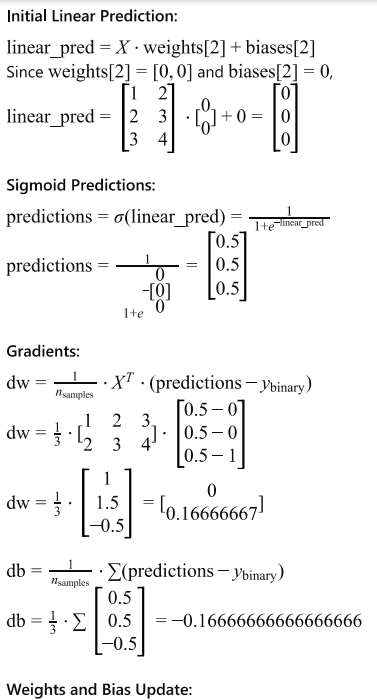

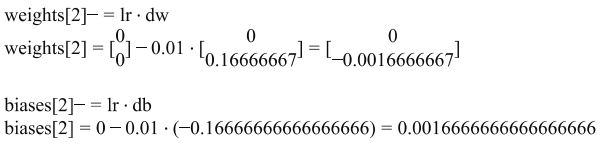

## **Class 2 Iteration 2**

In [68]:
linear_pred = np.dot(X, weights[2]) + biases[2]  # [-0.005, -0.00666667, -0.00833333]
predictions = sigmoid(linear_pred)  # [0.49875, 0.49833334, 0.49791668]
dw = (1 / n_samples) * np.dot(X.T, (predictions - y_binary))  # [-0.00361109,  0.16138891]
db = (1 / n_samples) * np.sum(predictions - y_binary)  # 0.16500000694440523
weights[2] -= lr * dw  # [3.61109407e-05, -3.28055580e-03]
biases[2] -= lr * db  # -0.0033166667361107186

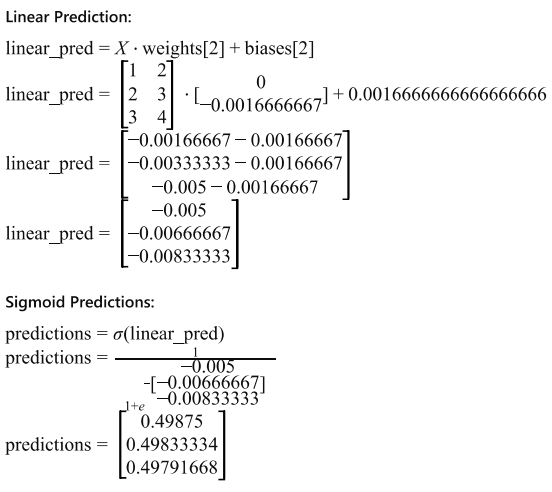

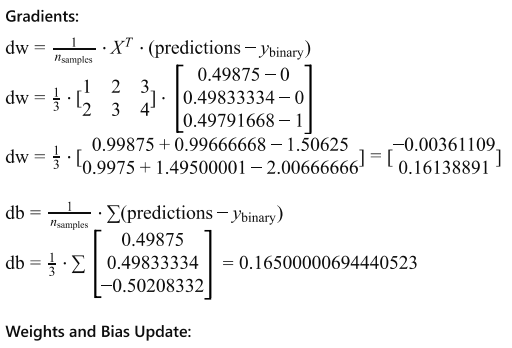

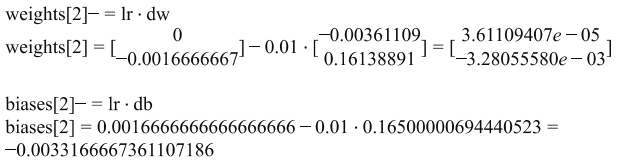

## **These weights and biases can be merged into matrices for the final model as follows:**

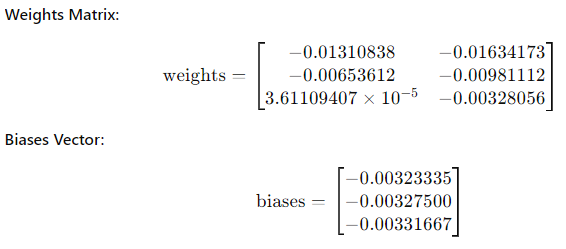

After completing the iterations for all three classes (0, 1, 2), we have updated the weights and biases accordingly. These weights and biases now store the learned parameters that can be used to make predictions for new data points. The logistic regression model has been trained to classify input features (X) into one of the three classes based on the provided labels (y).

To concatenate the results and integrate them into your logistic regression class, you would typically implement a predict method that utilizes these learned weights and biases to predict the class for new input data points. This predict method would apply the learned model parameters (weights and biases) to the input features, compute the linear predictions, apply the sigmoid function, and then determine the class with the highest probability as the predicted class.

# **Step-by-Step Prediction**

Let's compute the prediction for the input X=[3,4] using the final weights and biases:

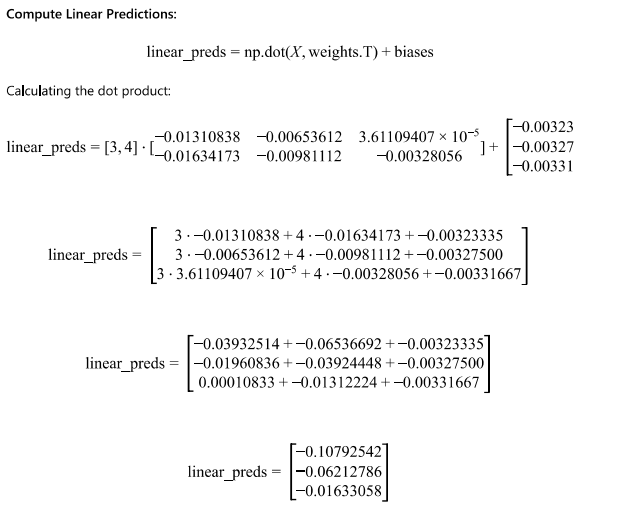

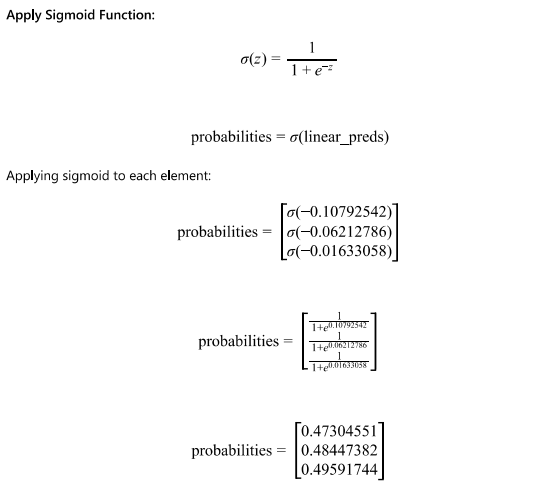

Selecting the Class with the Highest Probability

We use np.argmax to find the index of the maximum value in the probabilities array.

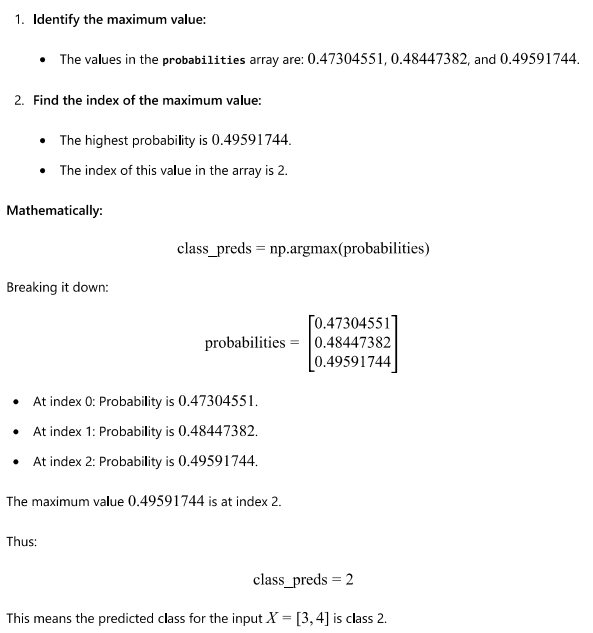

# **Implementation and Visualization**

Accuracy: 0.95


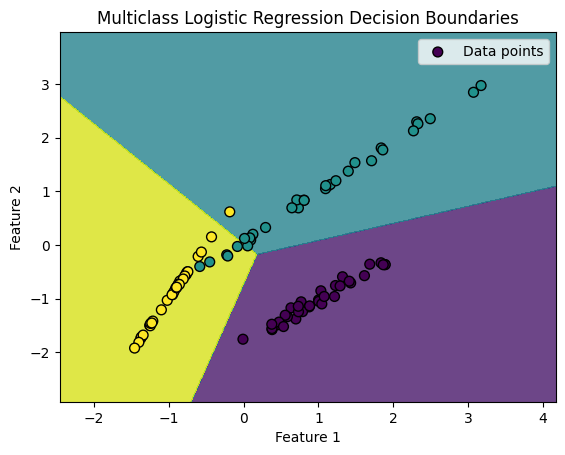

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate a synthetic classification dataset
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                                    n_clusters_per_class=1, n_classes=3, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Initialize and train Multiclass Logistic Regression model
clf = MulticlassLogisticRegression(lr=0.01, n_iters=1000)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Calculate accuracy
def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test) / len(y_test)

acc = accuracy(y_pred, y_test)
print("Accuracy:", acc)

# Plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                      np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', s=50, label='Data points')
plt.title('Multiclass Logistic Regression Decision Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# **Implementation Details**

* **Learning Rate (lr):** The learning rate determines the step size for updating the weights during training. It controls how much the model parameters are adjusted in response to the estimated error each time the model weights are updated.
* **Number of Iterations (n_iters):** This parameter specifies how many times the algorithm will iterate over the training data. Each iteration involves updating the model's weights and bias based on the gradients computed from the training data to minimize the error or loss function.
* **Weights :** In linear regression, weights (or coefficients) represent the slope of the line that best fits the data. These weights are adjusted during training to achieve the best possible fit between the input features and the target variable.
* **Bias :** Bias (or intercept) is an additional parameter in linear regression that allows the model to make predictions even when all input features are zero. It accounts for any offset in the data and ensures the model fits the data points correctly.

# **Key Considerations for Logistic Regression Modeling:**

* **Imbalance:** If classes are imbalanced, adjust classifiers to handle skewed distributions.
* **Scalability:** Works well for moderate 𝐾, but can become inefficient for very large 𝐾
* **Accuracy:** Performance can vary based on class separability and overlap.